In [2]:
import os 
# 필요 라이브러리 로드
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import platform

if platform.system() == 'Windows':
# 윈도우인 경우 맑은 고딕 폰트 이용
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf"
                                           ).get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')

#그래프에서 마이너스 기호가 표시되게 하는 설정입니다.
matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
df = pd.read_csv("시도·산업·종사자규모별_사업체수__종사자수_’06___20230427162816.csv",encoding='cp949')

In [4]:
df

,행정구역별,산업별,종사자규모별,2020,2020.1
0,행정구역별,산업별,종사자규모별,사업체수 (개),종사자수 (명)
1,전국,전체 산업,계,4325195,21583421
2,전국,전체 산업,1 - 4명,3587125,5699039
3,전국,전체 산업,5 - 9명,421489,2698584
4,전국,전체 산업,10 - 19명,170410,2255029
...,...,...,...,...,...
3068,제주,"협회 및 단체, 수리 및 기타 개인 서비스업(94~96)",5 - 9명,210,1329
3069,제주,"협회 및 단체, 수리 및 기타 개인 서비스업(94~96)",10 - 19명,92,1236
3070,제주,"협회 및 단체, 수리 및 기타 개인 서비스업(94~96)",20 - 49명,47,1302
3071,제주,"협회 및 단체, 수리 및 기타 개인 서비스업(94~96)",50 - 99명,6,387


In [5]:
df.columns=['행정구역별','산업별','종사자규모별','사업체수','종사자수']
df.head()

,행정구역별,산업별,종사자규모별,사업체수,종사자수
0,행정구역별,산업별,종사자규모별,사업체수 (개),종사자수 (명)
1,전국,전체 산업,계,4325195,21583421
2,전국,전체 산업,1 - 4명,3587125,5699039
3,전국,전체 산업,5 - 9명,421489,2698584
4,전국,전체 산업,10 - 19명,170410,2255029


In [6]:
df=df.drop(0) # 0번 컬럼 버림 

In [7]:
df=df.replace('X','0')

In [8]:
df=df.reset_index(drop=True)

In [9]:
df['산업별']=df['산업별'].str.split('(').str[0].str.replace(',','').str.replace(' ','')
df

,행정구역별,산업별,종사자규모별,사업체수,종사자수
0,전국,전체산업,계,4325195,21583421
1,전국,전체산업,1 - 4명,3587125,5699039
2,전국,전체산업,5 - 9명,421489,2698584
3,전국,전체산업,10 - 19명,170410,2255029
4,전국,전체산업,20 - 49명,95325,2835504
...,...,...,...,...,...
3067,제주,협회및단체수리및기타개인서비스업,5 - 9명,210,1329
3068,제주,협회및단체수리및기타개인서비스업,10 - 19명,92,1236
3069,제주,협회및단체수리및기타개인서비스업,20 - 49명,47,1302
3070,제주,협회및단체수리및기타개인서비스업,50 - 99명,6,387


In [10]:
df = df.astype({'사업체수':'int','종사자수':'int'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3072 entries, 0 to 3071
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   행정구역별   3072 non-null   object
 1   산업별     3072 non-null   object
 2   종사자규모별  3072 non-null   object
 3   사업체수    3072 non-null   int32 
 4   종사자수    3072 non-null   int32 
dtypes: int32(2), object(3)
memory usage: 96.1+ KB


In [11]:
df_region=df[df['행정구역별']!='전국'] 

In [12]:
df_region_sum=df_region[df_region['종사자규모별']=='계']

In [13]:
df_region_industry=df_region_sum[df_region_sum['산업별']!='전체산업']  ## 지역별 산업
df_region_industry

,행정구역별,산업별,종사자규모별,사업체수,종사자수
206,서울,농업임업및어업,계,64,532
212,서울,광업,계,11,58
216,서울,제조업,계,58865,245843
226,서울,전기가스증기및공기조절공급업,계,212,6020
234,서울,수도하수및폐기물처리원료재생업,계,498,9309
...,...,...,...,...,...
3028,제주,공공행정국방및사회보장행정,계,209,15385
3037,제주,교육서비스업,계,2842,20908
3046,제주,보건업및사회복지서비스업,계,2019,26991
3056,제주,예술스포츠및여가관련서비스업,계,1998,10446


In [14]:
df_seoul=df_region_industry[df_region_industry['행정구역별']=='서울']
df_busan=df_region_industry[df_region_industry['행정구역별']=='부산']
df_daegu=df_region_industry[df_region_industry['행정구역별']=='대구']
df_Incheon=df_region_industry[df_region_industry['행정구역별']=='인천']
df_gwangju=df_region_industry[df_region_industry['행정구역별']=='광주']
df_Daejeon=df_region_industry[df_region_industry['행정구역별']=='대전']
df_Ulsan=df_region_industry[df_region_industry['행정구역별']=='울산']
df_Sejong=df_region_industry[df_region_industry['행정구역별']=='세종']
df_gyeonggi=df_region_industry[df_region_industry['행정구역별']=='경기']
df_Gangwon=df_region_industry[df_region_industry['행정구역별']=='강원']
df_Chungbuk=df_region_industry[df_region_industry['행정구역별']=='충북']
df_Chungnam=df_region_industry[df_region_industry['행정구역별']=='충남']
df_Jeonbuk=df_region_industry[df_region_industry['행정구역별']=='전북']
df_Gyeongbuk=df_region_industry[df_region_industry['행정구역별']=='경북']
df_Gyeongnam=df_region_industry[df_region_industry['행정구역별']=='경남']
df_jeju=df_region_industry[df_region_industry['행정구역별']=='제주']


In [15]:
DataFrames = [df_seoul,df_busan,df_daegu,df_Incheon,df_gwangju,df_Daejeon,df_Ulsan,df_Sejong,df_gyeonggi
              ,df_Gangwon,df_Chungbuk,df_Chungnam,df_Jeonbuk,df_Gyeongbuk,df_Gyeongnam,df_jeju]

In [16]:
df_region_industry[df_region_industry['산업별']=='보건업 및 사회복지 서비스업(86~87)']

,행정구역별,산업별,종사자규모별,사업체수,종사자수


C:\Users\admin\AppData\Local\Temp\ipykernel_7300\3198278367.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df['산업별'], rotation=90)


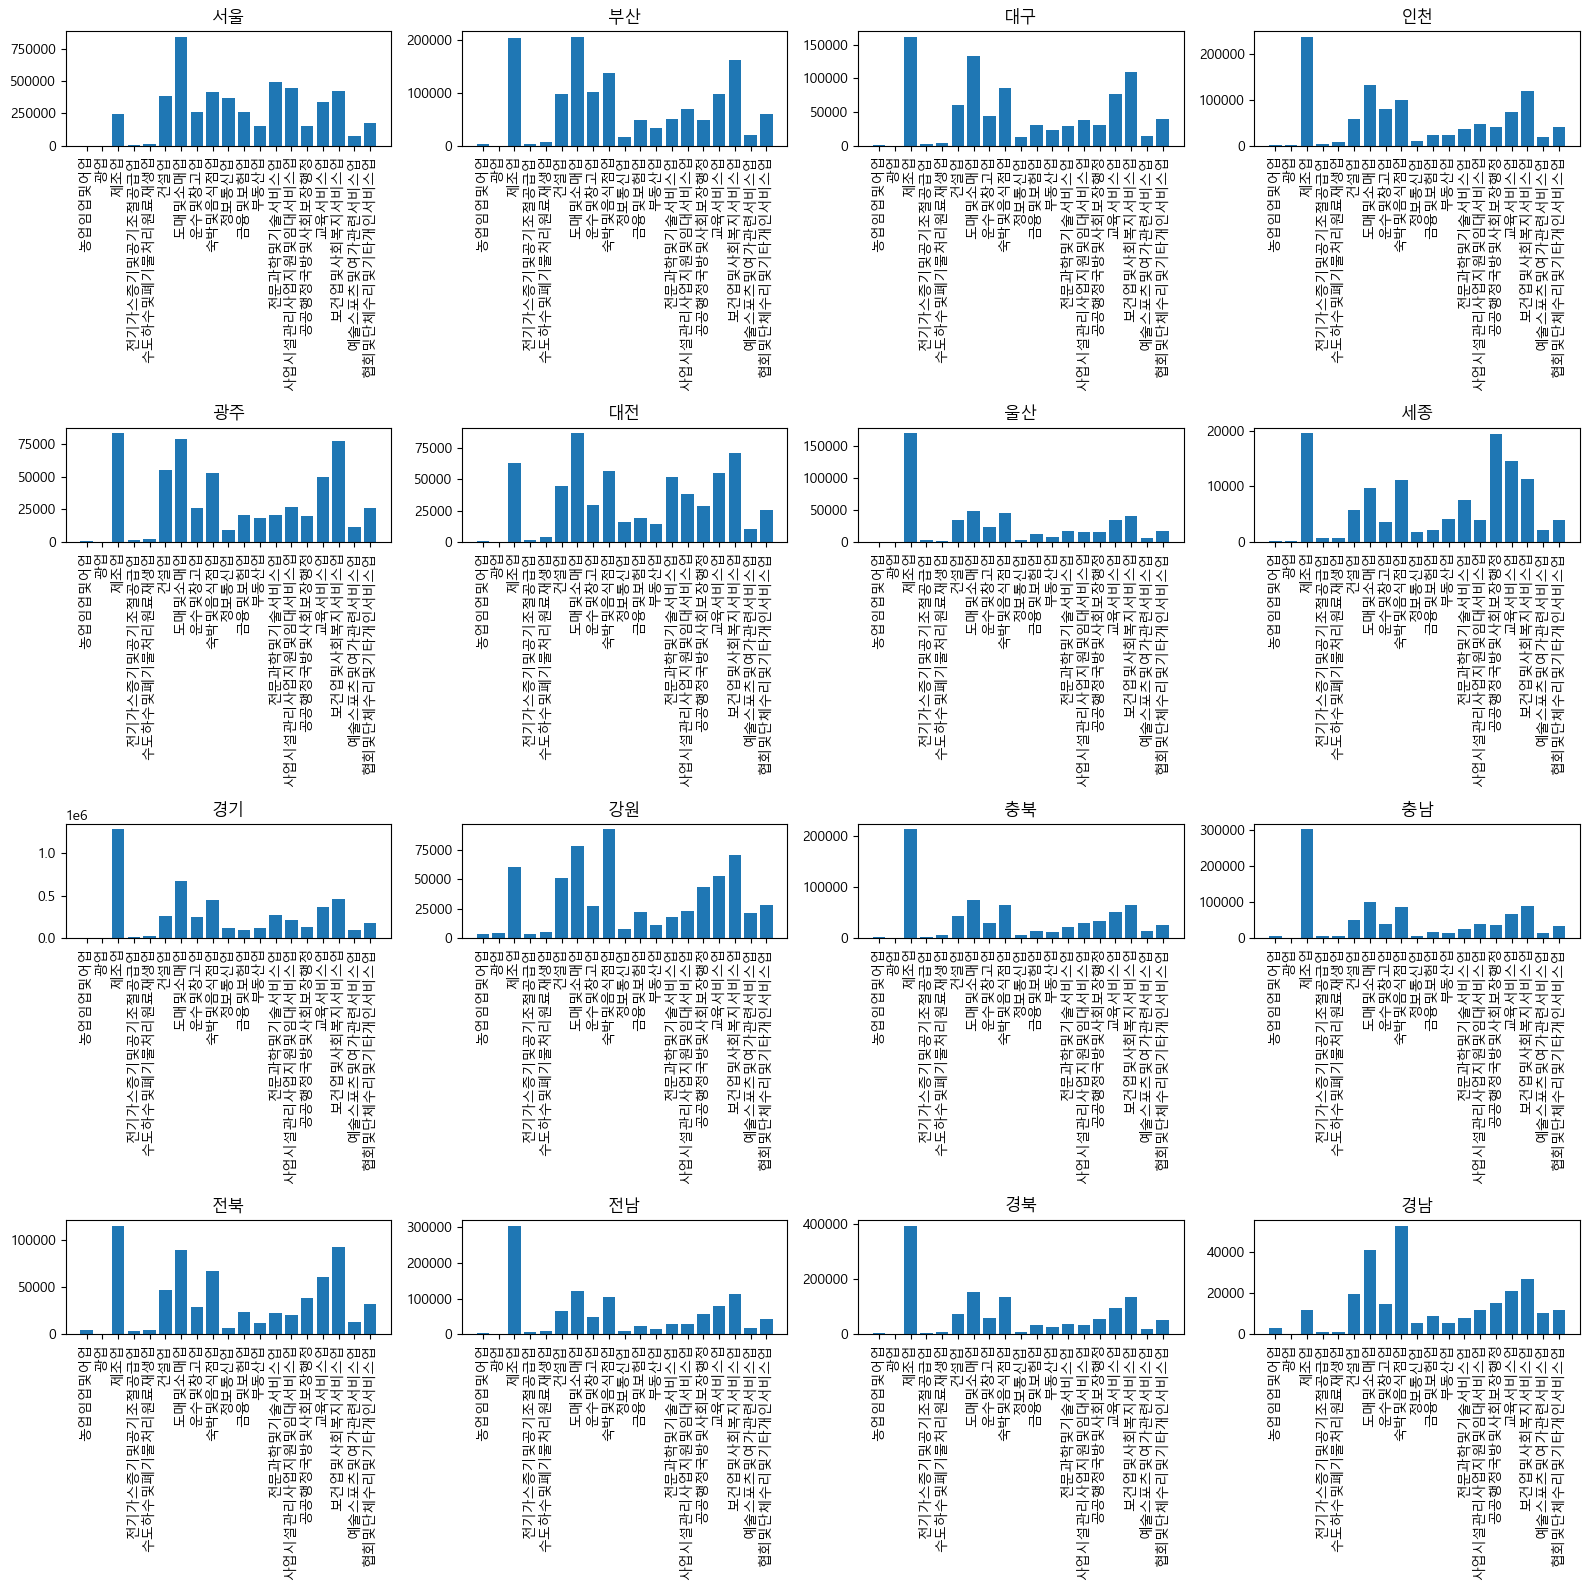

In [19]:
rows = 4
cols = 4
fig, axes = plt.subplots(rows, cols, figsize=(16,16))
columns =['서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', '충북',
       '충남', '전북', '전남', '경북', '경남', '제주']
for idx, df in enumerate(DataFrames):
    row = idx // cols
    col = idx % cols
    ax = axes[row][col]
    ax.bar('산업별', '종사자수', data=df)
    ax.set_xticklabels(df['산업별'], rotation=90)
    ax.set_title(f'{columns[idx]}')
    
plt.tight_layout()
plt.show()

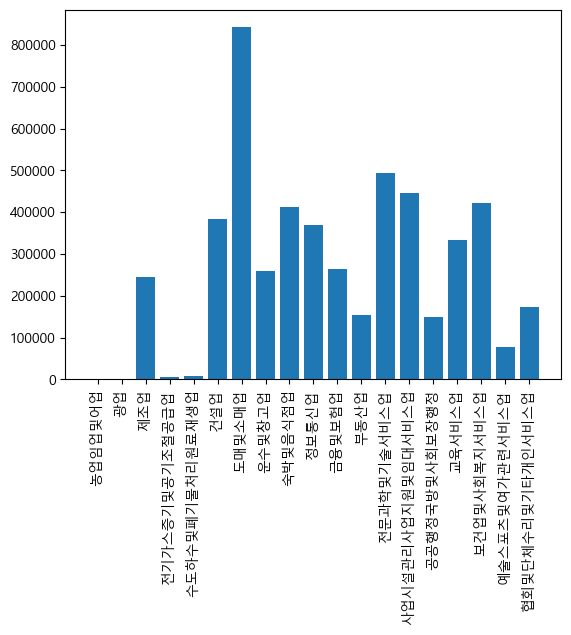

In [15]:
# 서울 종사자수 
fig, ax =plt.subplots()
ax.bar('산업별','종사자수',data=df_seoul)
plt.xticks(rotation=90)
plt.show() 


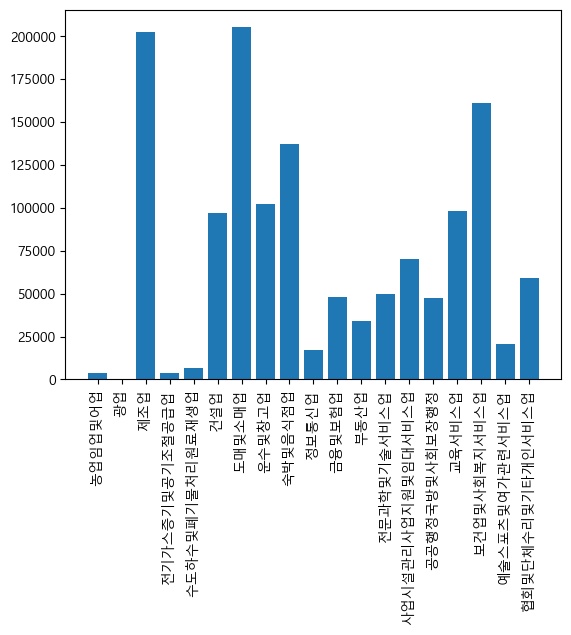

In [16]:
#부산
fig, ax =plt.subplots()
ax.bar('산업별','종사자수',data=df_busan)
plt.xticks(rotation=90)
plt.show()
# 제조업  도소매업  사회복지 서비스업 


https://www.busan.go.kr/news/snsbusan02/view?dataNo=46075
부산이 내년 1월 전국 7대 도시 중 처음으로 고령사회(전체인구의 14% 이상이 노인인구)에 진입한다. 노인인구가 전체의 20%를 넘는 초고령사회 역시 오는 2021년께 7대도시 중 가장 빨리 진입할 것으로 예측한다. 이들이 행복하지 않고서 지역의 복지와 행복을 말할 수 없게 됐다.
http://weekly.chosun.com/news/articleView.html?idxno=21841
초고령화 1호 대도시, '노인과 부산'의 미래 - 주간조선

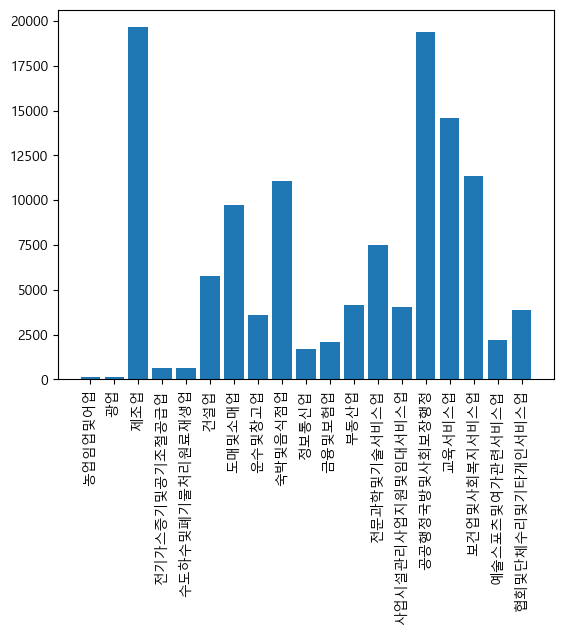

In [15]:
#세종시
fig, ax =plt.subplots()
ax.bar('산업별','종사자수',data=df_Sejong)
plt.xticks(rotation=90)
plt.show()
# 제조업  도소매업  사회복지 서비스업 

In [16]:
df_gyeonggi

,행정구역별,산업별,종사자규모별,사업체수,종사자수
1561,경기,농업임업및어업,계,797,5535
1568,경기,광업,계,88,1404
1574,경기,제조업,계,139238,1282263
1584,경기,전기가스증기및공기조절공급업,계,453,9115
1593,경기,수도하수및폐기물처리원료재생업,계,2361,28435
1600,경기,건설업,계,35074,264745
1610,경기,도매및소매업,계,227767,676973
1620,경기,운수및창고업,계,98423,243999
1630,경기,숙박및음식점업,계,173274,445081
1640,경기,정보통신업,계,8927,121948


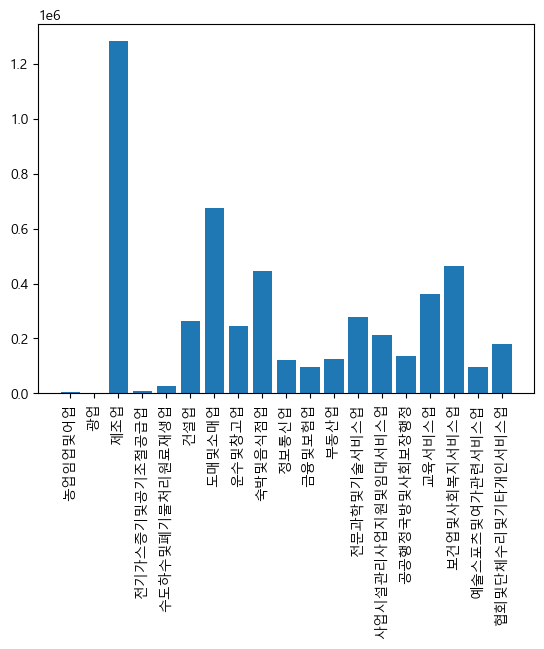

In [17]:
#경기도 
fig, ax =plt.subplots()
ax.bar('산업별','종사자수',data=df_gyeonggi)
plt.xticks(rotation=90)
plt.show()

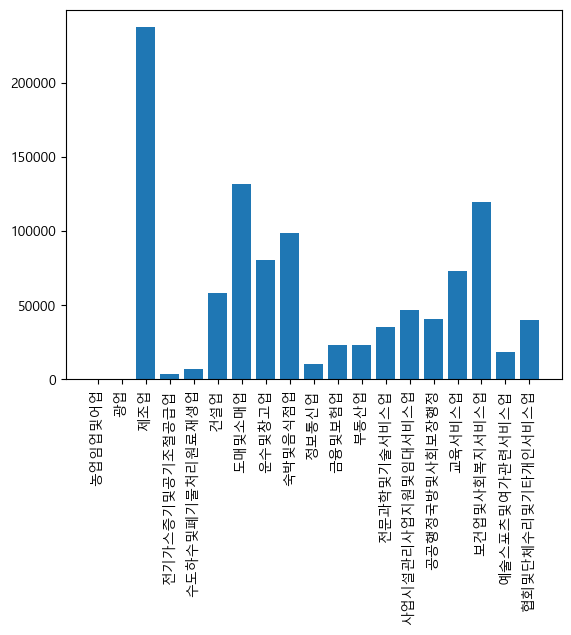

In [18]:
#인천
fig, ax =plt.subplots()
ax.bar('산업별','종사자수',data=df_Incheon)
plt.xticks(rotation=90)
plt.show()